<a href="https://colab.research.google.com/github/isb-cgc/Community-Notebooks/blob/master/HTAN/Python%20Notebooks/Explore_HTAN_Clinical_Biospecimen_Assay_Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore HTAN Clinical, Biospecimen, and Assay Metadata


        Title:   Explore HTAN Clinical, Biospecimen, and Assay Metadata in Python
        Author:  Clarisse Lau (clau@systemsbiology.org)
        Created: July 27, 2022
        Updated: March 7, 2024
        Purpose: Explore HTAN metadata tables in Python


# 1. Introduction & Overview
[HTAN](https://humantumoratlas.org/) is a National Cancer Institute (NCI)-funded Cancer Moonshot initiative to construct 3-dimensional atlases of the dynamic cellular, morphological, and molecular features of human cancers as they evolve from precancerous lesions to advanced disease. [Cell April 2020](https://www.sciencedirect.com/science/article/pii/S0092867420303469)

Clinical data, sample biospecimen data and assay files in HTAN have a rich set of annotations supplied by HTAN data contributors. These annotations are made according to the [HTAN Data model](https://data.humantumoratlas.org/standards), a set of standards defined by the HTAN consortium. The supplied values of these attributes have been collected into comprehensive data tables on the cloud, using the Google BigQuery structure that is part of Google Cloud Project.

This notebook shows one example of how data can be accessed and analyzed using Python.

## 1.1 Goal
This example notebook illustrates how to make use of HTAN Google BigQuery metadata tables to tabulate and plot available HTAN clinical, biospecimen, and assay metadata describing files available from [HTAN](https://data.humantumoratlas.org/). Summaries for other available metadata attributes can be generated by extending these examples.

## 1.2 Inputs, Outputs, & Data
The originating data can be found on the [HTAN Data Portal](https://data.humantumoratlas.org/), and the compiled tables are on the [Cancer Gateway in the Cloud](https://isb-cgc.appspot.com/).

## 1.3 Notes

The queries and results in this notebook correspond to **HTAN Data Release 4**. To choose a different release, edit the BigQuery table names in this notebook by replacing the string `r4` with a selected numbered release, e.g. `r2`. To get results for the most current data release, replace `r4` with `current` and `HTAN_versioned` with `HTAN`.  

(For example replace `isb-cgc-bq.HTAN_versioned.clinical_tier1_demographics_r4` with `isb-cgc-bq.HTAN.clinical_tier1_demographics_current`).

# 2. Environment & Module Setup



In [1]:
# Import libraries
import pandas as pd

The following snippet controls plotting parameters.

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

# 3. Google Authentication

Running the BigQuery cells in this notebook requires a Google Cloud Project. Instructions for creating a project can be found in [Google Cloud Documentation](https://cloud.google.com/resource-manager/docs/creating-managing-projects#console). The instance needs to be authorized to bill the project for queries. For more information on getting started with ISB-CGC see [Quick Start Guide to ISB-CGC](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/HowToGetStartedonISB-CGC.html) and alternative authentication methods can be found in [Google Cloud Documentation](https://cloud.google.com/resource-manager/docs/creating-managing-projects#console).

## 3.1 Authenticating with Google Credentials



#### Option 1. Running in Google Colab

If you are using Google Colab, run the code block below to authenticate

In [3]:
from google.colab import auth
auth.authenticate_user()

#### Option 2. Running on local machine

Alternatively, if you're running the notebook locally, take the following steps to authenticate.

1.   Run `gcloud auth application-default login` on your local machine
2.   Run the command below replacing `<path to key>` with the path to your credentials file

In [ ]:
# %env GOOGLE_APPLICATION_CREDENTIALS=<path to key>

## 3.2 Initializing the Google BigQuery client


In [4]:
# Import the Google BigQuery client
from google.cloud import bigquery

# Set the google project that will be billed for this notebook's computations
google_project = '<my-project>'

# Create a client to access the data within BigQuery
client = bigquery.Client(google_project)

# 4. Analyzing Clinical Data in HTAN

In the [HTAN Data model](https://data.humantumoratlas.org/standards), [Tier 1 Clinical Data](https://data.humantumoratlas.org/standard/clinical) has seven components:

1.   Demographics
2.   Diagnosis
3.   Exposure
4.   Family History
5.   Follow Up
6.   Molecular Test
7.   Therapy

All HTAN demographic data is collected into a single Demographics table [isb-cgc-bq.HTAN.clinical_tier1_demographics_current](https://isb-cgc.appspot.com/bq_meta_search/isb-cgc-bq.HTAN_versioned.clinical_tier1_demographics_r4/
) in Google BigQuery containing data across all [HTAN Centers](https://humantumoratlas.org/research-network). The same is true of Diagnosis, and so on.

### 4.1 Demographics
Let's look at demographic distributions in HTAN. We begin by constructing an SQL query (as a string), then sending that
as query to HTAN Google BigQuery to retrieve the Demographics table. We remove a few unneeded bookkeeping columns.

In [5]:
demographics = client.query("""
  SELECT DISTINCT *
  EXCEPT(entityId, Component, Manifest_Id, Manifest_Version, Id)
  FROM `isb-cgc-bq.HTAN_versioned.clinical_tier1_demographics_r4`
    """).result().to_dataframe()

demographics['HTAN_Center'] = [x.replace('HTAN ','') for x in demographics['HTAN_Center']]
demographics

,Age_Is_Obfuscated,Days_to_Birth,Occupation_Duration_Years,Year_of_Death,Gender,Vital_Status,Race,Premature_At_Birth,Cause_of_Death_Source,HTAN_Participant_ID,Weeks_Gestation_at_Birth,Days_to_Death,Cause_of_Death,Year_Of_Birth,Country_of_Residence,Ethnicity,HTAN_Center
0,None,0,None,None,female,Alive,Other,Not Reported,Not Reported,HTA11_347,None,None,Not Reported,1959.0,None,not hispanic or latino,Vanderbilt
1,True,None,None,None,male,Alive,Other,None,None,HTA7_985,None,None,None,None,None,hispanic or latino,HMS
2,True,0,None,None,male,Dead,Other,None,Death Certificate,HTA3_80018,None,None,Cancer Related,None,None,unknown,BU
3,True,0,None,None,Not Reported,Alive,Other,None,None,HTA3_80026,None,None,Not Applicable,None,None,not hispanic or latino,BU
4,True,None,None,None,female,Alive,Other,Unknown,None,HTA2_229,None,None,None,1957,None,hispanic or latino,HTAPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,True,None,None,None,female,Alive,black or african american,None,None,HTA12_155,None,None,Not Applicable,1981.0,United States,not hispanic or latino,WUSTL
1943,True,None,None,None,female,Alive,black or african american,None,None,HTA12_88,None,None,None,None,None,not hispanic or latino,WUSTL
1944,True,None,None,None,female,Alive,black or african american,None,None,HTA12_91,None,None,None,None,None,not hispanic or latino,WUSTL
1945,True,None,None,None,female,Alive,black or african american,None,None,HTA12_95,None,None,None,None,None,not hispanic or latino,WUSTL


In [6]:
# get number of distinct participants
len(set(demographics['HTAN_Participant_ID']))

1938

Each row in this table represents a participant for which demographics information is reported. In some cases, participant demographic info was submitted more than once to represent a patient update, such as change in `Vital Status`.

We have a total of 1947 demographic records, representing 1938 distinct HTAN participants as of Data Release 4.0.

Participants per HTAN center

In [7]:
demographics.groupby(['HTAN_Center'])['HTAN_Participant_ID'].count()

HTAN_Center
BU             146
CHOP            30
DFCI           115
Duke           767
HMS            130
HTAPP          205
MSK             99
OHSU            15
Stanford        30
TNP - TMA       51
TNP SARDANA      2
Vanderbilt     157
WUSTL          200
Name: HTAN_Participant_ID, dtype: int64

You will see some differences between this table and the case counts on the [HTAN Data Portal](https://humantumoratlas.org/).
(Some contributing factors: This notebook is fixed to HTAN data Release 4.0 while the portal has additional data;
the portal case inclusion criterion does not correspond to this simple row count.)

The columns in the Demographics table each represent a demographic attribute as defined in the HTAN [Clinical Tier 1 Demographics Data Model](https://data.humantumoratlas.org/standard/clinical). They include:

In [ ]:
demographics.columns

Index(['Age_Is_Obfuscated', 'Days_to_Birth', 'Occupation_Duration_Years',
       'Year_of_Death', 'Gender', 'Vital_Status', 'Race', 'Premature_At_Birth',
       'Cause_of_Death_Source', 'HTAN_Participant_ID',
       'Weeks_Gestation_at_Birth', 'Days_to_Death', 'Cause_of_Death',
       'Year_Of_Birth', 'Country_of_Residence', 'Ethnicity', 'HTAN_Center'],
      dtype='object')

### 4.1.1 Race
Race is one of the Demographics attributes. Let's tabulate reported Race in HTAN and report the fraction as a percent.

In [11]:
demographics_race_reported = demographics[
    ~demographics['Race'].isin(
    ['unknown','Unknown','Not Reported','not allowed to collect'])]

count = demographics_race_reported.Race.value_counts().rename_axis('Race').to_frame('n')

perc = demographics_race_reported['Race'].value_counts(
    normalize=True).rename_axis('Race').to_frame('Percent').round(decimals=3) * 100

pd.merge(count, perc, on='Race', how='inner')

,n,Percent
Race,,
white,1419,80.8
black or african american,294,16.7
asian,35,2.0
Other,9,0.5


Here is a barchart showing the distribution

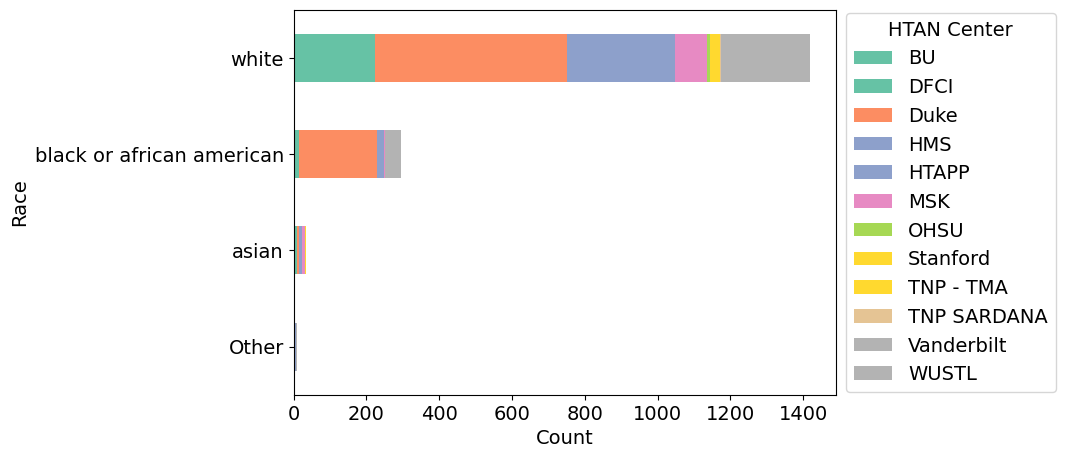

In [ ]:
plt.rcParams.update({'font.size': 14})

demographics_race_reported.groupby(
    ['Race','HTAN_Center']).size().unstack().plot.barh(stacked=True,
    figsize=(7,5), colormap='Set2')

plt.xlabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='HTAN Center')

### 4.1.2 Gender
Similarly, here's a barchart showing the breakdown by Gender.

In [15]:
demographics_gender_reported = demographics[
    ~demographics['Gender'].isin(['Not Reported','unknown','Unknown'])]

demographics_gender_reported = demographics_gender_reported[['Gender','HTAN_Participant_ID']].drop_duplicates()
count = demographics_gender_reported.Gender.value_counts().rename_axis('Gender').to_frame('n')

perc = demographics_gender_reported['Gender'].value_counts(
    normalize=True).rename_axis('Gender').to_frame('Percent').round(decimals=3) * 100

pd.merge(count, perc, on='Gender', how='inner')

,n,Percent
Gender,,
female,1471,77.1
male,437,22.9


In [14]:
demographics_gender_reported = demographics[
    ~demographics['Gender'].isin(['Not Reported','unknown','Unknown'])]
demographics_gender_reported['Gender']

0       female
1         male
2         male
4       female
5       female
         ...  
1942    female
1943    female
1944    female
1945    female
1946    female
Name: Gender, Length: 1917, dtype: object

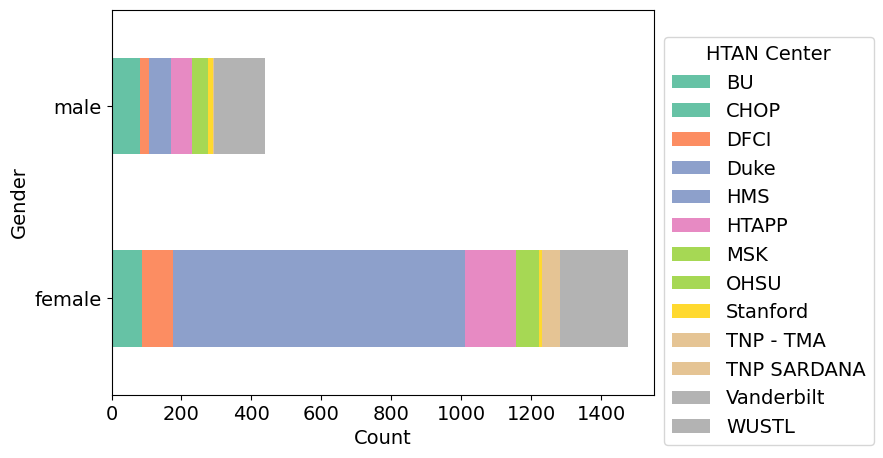

In [ ]:
plt.rcParams.update({'font.size': 14})

demographics_gender_reported.groupby(
    ['Gender','HTAN_Center']).size().unstack().plot.barh(
    stacked=True, figsize=(7,5), colormap='Set2')

plt.xlabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.4), title='HTAN Center')

### 4.2 Treatment
Let's take a look at annotated treatment in HTAN. This can be found in the Therapy table.

In [16]:
therapy = client.query("""
  SELECT DISTINCT * EXCEPT(entityId, Component, Manifest_Id, Manifest_Version, Id)
  FROM `isb-cgc-bq.HTAN_versioned.clinical_tier1_therapy_r4`
    """).result().to_dataframe()

therapy['HTAN_Center'] = [x.replace('HTAN ','') for x in therapy['HTAN_Center']]
therapy

,Treatment_Type,Treatment_Dose_Units,Chemo_Concurrent_to_Radiation,Treatment_Frequency,Reason_Treatment_Ended,Days_to_Treatment_Start,Treatment_Arm,HTAN_Participant_ID,Treatment_Dose,Treatment_Outcome,...,Number_of_Cycles,Initial_Disease_Status,Therapeutic_Agents,Treatment_or_Therapy,Treatment_Effect,Treatment_Intent_Type,Regimen_or_Line_of_Therapy,Days_to_Treatment_End,Treatment_Effect_Indicator,HTAN_Center
0,Targeted Molecular Therapy,None,None,None,None,24708,None,HTA9_7,None,None,...,None,None,Olaparib,None,None,None,Olaparib,24760,None,OHSU
1,Targeted Molecular Therapy,None,None,None,None,22874,None,HTA9_8,None,None,...,None,None,Olaparib,None,None,None,Olaparib,22947,None,OHSU
2,Targeted Molecular Therapy,None,None,None,None,19748,None,HTA9_9,None,None,...,None,None,Olaparib,None,None,None,Olaparib,19814,None,OHSU
3,Targeted Molecular Therapy,None,None,None,None,26221,None,HTA9_10,None,None,...,None,None,Olaparib,None,None,None,Olaparib,26529,None,OHSU
4,Targeted Molecular Therapy,None,None,None,None,9981,None,HTA9_11,None,None,...,None,None,Olaparib,None,None,None,Olaparib,10028,None,OHSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Concurrent Chemoradiation,None,None,None,Course of Therapy Completed,None,None,HTA12_24,None,Partial Response,...,12; 5,Initial Diagnosis,Folfiri + SBRT,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,First,None,None,WUSTL
1913,Chemotherapy,None,None,None,Course of Therapy Completed,None,None,HTA12_26,None,Partial Response,...,6,Initial Diagnosis,Folfirinox,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,First,None,None,WUSTL
1914,Chemotherapy,None,None,None,Adverse Therapy Event,None,None,HTA12_31,None,No Response,...,2,Initial Diagnosis,Folfirinox,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,First,None,None,WUSTL
1915,Concurrent Chemoradiation,None,None,None,Course of Therapy Completed,None,None,HTA12_147,None,No Response,...,8,Initial Diagnosis,Gemzar + Abraxane,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,Second,None,None,WUSTL


Now filter this table to retrieve instances of annotated therapy.

In [17]:
therapy_yes = therapy[
    (therapy['Treatment_or_Therapy'].isin(["Yes"]) |
     ~therapy['Treatment_Type'].isnull()) &
    ~therapy['Treatment_Type'].isin(["Not Reported","None","unknown",'Not Reported,'])]
therapy_yes

,Treatment_Type,Treatment_Dose_Units,Chemo_Concurrent_to_Radiation,Treatment_Frequency,Reason_Treatment_Ended,Days_to_Treatment_Start,Treatment_Arm,HTAN_Participant_ID,Treatment_Dose,Treatment_Outcome,...,Number_of_Cycles,Initial_Disease_Status,Therapeutic_Agents,Treatment_or_Therapy,Treatment_Effect,Treatment_Intent_Type,Regimen_or_Line_of_Therapy,Days_to_Treatment_End,Treatment_Effect_Indicator,HTAN_Center
0,Targeted Molecular Therapy,None,None,None,None,24708,None,HTA9_7,None,None,...,None,None,Olaparib,None,None,None,Olaparib,24760,None,OHSU
1,Targeted Molecular Therapy,None,None,None,None,22874,None,HTA9_8,None,None,...,None,None,Olaparib,None,None,None,Olaparib,22947,None,OHSU
2,Targeted Molecular Therapy,None,None,None,None,19748,None,HTA9_9,None,None,...,None,None,Olaparib,None,None,None,Olaparib,19814,None,OHSU
3,Targeted Molecular Therapy,None,None,None,None,26221,None,HTA9_10,None,None,...,None,None,Olaparib,None,None,None,Olaparib,26529,None,OHSU
4,Targeted Molecular Therapy,None,None,None,None,9981,None,HTA9_11,None,None,...,None,None,Olaparib,None,None,None,Olaparib,10028,None,OHSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Concurrent Chemoradiation,None,None,None,Course of Therapy Completed,None,None,HTA12_24,None,Partial Response,...,12; 5,Initial Diagnosis,Folfiri + SBRT,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,First,None,None,WUSTL
1913,Chemotherapy,None,None,None,Course of Therapy Completed,None,None,HTA12_26,None,Partial Response,...,6,Initial Diagnosis,Folfirinox,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,First,None,None,WUSTL
1914,Chemotherapy,None,None,None,Adverse Therapy Event,None,None,HTA12_31,None,No Response,...,2,Initial Diagnosis,Folfirinox,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,First,None,None,WUSTL
1915,Concurrent Chemoradiation,None,None,None,Course of Therapy Completed,None,None,HTA12_147,None,No Response,...,8,Initial Diagnosis,Gemzar + Abraxane,Yes,Incomplete Necrosis (Viable Tumor Present),Neoadjuvant,Second,None,None,WUSTL


In [18]:
len(set(therapy_yes['HTAN_Participant_ID']))

387

There are 790 therapy annotations in total, for 387 participants.

By center and treatment type:

In [19]:
therapy_yes.groupby(['HTAN_Center','Treatment_Type'])['Treatment_Type'].count()

HTAN_Center  Treatment_Type                        
BU           Chemotherapy                                1
CHOP         Chemotherapy                               25
DFCI         Chemotherapy                               11
             Hormone Therapy                            12
             Other                                       1
             Targeted Molecular Therapy                  4
HMS          Chemotherapy                               68
HTAPP        Chemotherapy                                6
             Radiation Therapy NOS                       1
             Stereotactic Radiosurgery                   1
             Surgery                                    12
MSK          Chemotherapy                              117
             Concurrent Chemoradiation                   7
             External Beam Radiation                    51
             Immunotherapy (Including Vaccines)         16
             Other                                       9
    

# 5. Analyzing Biospecimen Data in HTAN
Biospecimen data in HTAN conforms to the [Biospecimen Data](https://data.humantumoratlas.org/standard/biospecimen) standard,
and all annotated values can be obtained in a single BigQuery table.

In [ ]:
biospecimen = client.query("""
  SELECT * EXCEPT(Component, entityId, Manifest_Id, Manifest_Version, Id)
  FROM `isb-cgc-bq.HTAN_versioned.biospecimen_r4`
    """).result().to_dataframe()

biospecimen['HTAN_Participant_ID'] = biospecimen['HTAN_Biospecimen_ID'].str.split('_').str[:-1].str.join('_')
biospecimen

,Biospecimen_Dimension_1,Histology_Assessment_By,Dysplasia_Fraction,Analyte_Type,Sectioning_Days_from_Index,Percent_Lymphocyte_Infiltration,Lysis_Buffer,Slide_Charge_Type,Timepoint_Label,Preinvasive_Morphology,...,Section_Number_in_Sequence,Acquisition_Method_Type,Fiducial_Marker,Percent_Tumor_Nuclei,Fixative_Type,Tumor_Tissue_Type,Source_HTAN_Biospecimen_ID,Processing_Location,HTAN_Center,HTAN_Participant_ID
0,None,None,None,None,None,None,None,None,final,None,...,None,Other Acquisition Method,None,None,None,Metastatic,None,None,HTAN MSK,HTA8_1026
1,None,None,None,None,None,None,None,None,on treatment,None,...,None,Other Acquisition Method,None,None,None,Metastatic,None,None,HTAN MSK,HTA8_1027
2,None,None,None,None,None,None,None,None,baseline,None,...,None,Other Acquisition Method,None,None,None,Metastatic,None,None,HTAN MSK,HTA8_2012
3,None,None,None,None,None,None,None,None,Not recorded,None,...,None,Other Acquisition Method,None,None,None,None,None,None,HTAN HTAPP,HTA1_613
4,None,None,None,None,None,None,None,None,Not recorded,None,...,None,Other Acquisition Method,None,None,None,None,None,None,HTAN HTAPP,HTA1_613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,None,None,None,None,None,None,None,None,Initial Diagnosis,None,...,None,Surgical Resection,None,None,Formalin,Primary,None,None,HTAN HMS,HTA7_1002
7564,None,None,None,None,None,None,None,None,Initial Diagnosis,None,...,None,Surgical Resection,None,None,Formalin,Primary,None,None,HTAN HMS,HTA7_1003
7565,None,None,None,None,None,None,None,None,Initial Diagnosis,None,...,None,Surgical Resection,None,None,Formalin,Primary,None,None,HTAN HMS,HTA7_1004
7566,None,None,None,None,None,None,None,None,Initial Diagnosis,None,...,None,Surgical Resection,None,None,Formalin,Primary,None,None,HTAN HMS,HTA7_1005


In [ ]:
len(set(biospecimen['HTAN_Biospecimen_ID']))

7543

In [ ]:
len(set(biospecimen['HTAN_Participant_ID']))

1722

There are 7543 unique biospecimens from 1722 participants

As an example, let's take a look at the various storage methods used for HTAN biospecimens

### 5.1 Storage Methods

In [ ]:
biospecimen_storage_noted = biospecimen[
    ~biospecimen['Storage_Method'].isin(
    ['unknown','Unknown','Not Applicable'])]
pd.crosstab(
    biospecimen_storage_noted.Storage_Method,
    biospecimen_storage_noted.HTAN_Center)

HTAN_Center,HTAN BU,HTAN CHOP,HTAN DFCI,HTAN Duke,HTAN HMS,HTAN HTAPP,HTAN MSK,HTAN OHSU,HTAN Stanford,HTAN TNP - TMA,HTAN TNP SARDANA,HTAN Vanderbilt,HTAN WUSTL
Storage_Method,,,,,,,,,,,,,
Ambient temperature,60,0,0,0,118,0,0,105,2,0,0,0,0
Fresh,15,0,0,0,0,516,50,0,0,0,0,181,0
Frozen at -150C,0,0,0,0,0,11,0,0,0,0,0,0,0
Frozen at -80C,506,0,10,0,222,297,0,43,0,0,0,51,584
Frozen in liquid nitrogen,0,34,0,0,0,66,8,0,233,0,0,0,14
Frozen in vapor phase,0,0,0,0,0,41,0,14,0,0,0,0,0
Paraffin block,0,0,0,1229,0,125,37,0,0,0,0,1,0
Refrigerated at 4 degrees,0,0,0,0,477,0,0,2,0,1432,73,0,2


### 6. Assay types in HTAN

HTAN data is generated from multiple assay types, probing cancers and the tumor microenvironment at molecular, cellular, and tissue level,
using bulk, single-cell, and spatial assays. As described on the [HTAN Data Standards](https://data.humantumoratlas.org/standards)
page, generated data are arranged into data "Levels" corresponding to bioinformatic processing steps. In BigQuery, each
assay type and level is collected into a single table.

For example, we can take a look at Single Cell RNA-seq Level 4 metadata by querying the table [isb-cgc-bq.HTAN_versioned.scRNAseq_level4_metadata_r4](https://isb-cgc.appspot.com/bq_meta_search/isb-cgc-bq.HTAN_versioned.scRNAseq_level4_metadata_r4/):

In [ ]:
scl4 = client.query("""
  SELECT * FROM `isb-cgc-bq.HTAN_versioned.scRNAseq_level4_metadata_r4`
  """).result().to_dataframe()

scl4

,entityId,scRNAseq_Workflow_Parameters_Description,Workflow_Version,HTAN_Data_File_ID,Id,Component,Workflow_Link,scRNAseq_Workflow_Type,File_Format,Filename,HTAN_Parent_Data_File_ID,HTAN_Center,Manifest_Id,Manifest_Version,File_Size,md5,Data_Release,CDS_Release
0,syn23626805,Cell type composition of SCLC immune dataset,Not available,HTA8_4_100036,1bdcefd7-d0a2-4c11-9a19-01a93139c70a,ScRNA-seqLevel4,Not available,Other,txt,single_cell_RNAseq_level_4/immune.SCLC_samples...,"HTA8_1001_310001,HTA8_1001_310002,HTA8_1001_31...",HTAN MSK,syn39253706,1,7230,119a0ef291da4f8a3945a56a1d092aff,Release 1.0,None
1,syn23626806,Sample covariates of SCLC immune dataset,Not available,HTA8_4_100039,6491f147-bb49-411b-9905-2cbeb297741f,ScRNA-seqLevel4,Not available,Other,txt,single_cell_RNAseq_level_4/immune.SCLC_samples...,"HTA8_1001_310001,HTA8_1001_310002,HTA8_1001_31...",HTAN MSK,syn39253706,1,769,a043928b301616d149c11c7424798e79,Release 1.0,None
2,syn23626831,Cell type composition of SCLC myeloid dataset,Not available,HTA8_4_100050,b082961b-8649-4461-8bf3-694d0cabb133,ScRNA-seqLevel4,Not available,Other,txt,single_cell_RNAseq_level_4/myeloid.SCLC_sample...,"HTA8_1001_310001,HTA8_1001_310002,HTA8_1001_31...",HTAN MSK,syn39253706,1,4747,3a398a2b1f76749cb21337392d295914,Release 1.0,None
3,syn23626828,Sample covariates of SCLC myeloid dataset,Not available,HTA8_4_100055,67e24b5b-57ad-4740-8fcb-7ba6aa3169c0,ScRNA-seqLevel4,Not available,Other,txt,single_cell_RNAseq_level_4/myeloid.SCLC_sample...,"HTA8_1001_310001,HTA8_1001_310002,HTA8_1001_31...",HTAN MSK,syn39253706,1,604,4db0be0dde1fc2da9e4c7c694efc3f02,Release 1.0,None
4,syn23627463,Pathway correlation to PLCG2-high module,Not available,HTA8_4_100258,0970701f-047c-4cff-88ff-27757c8bf368,ScRNA-seqLevel4,Not available,Other,txt,single_cell_RNAseq_level_4/SCLC/pearson.PLCG2-...,"HTA8_1001_310001,HTA8_1001_310002,HTA8_1001_31...",HTAN MSK,syn39253706,1,1035,f1f61e68bbedf27d519a9232ffc16861,Release 1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,syn49693592,scHPF was run with default hyperparameters and...,scHPF 0.5.0,HTA8_4_100273,0a4ed791-fbf7-4a4d-8334-c9cdc6196957,ScRNA-seqLevel4,https://schpf.readthedocs.io/en/latest/index.html,SEQC,csv,glasner_etal_single_cell_RNAseq_level_4/fib_sc...,"HTA8_1005_330001,HTA8_1028_310001,HTA8_1029_31...",HTAN MSK,syn51039914,6,1158228,ff059a7d6e68dd7c9086f7afb858d6e1,Release 3.0,None
370,syn49693635,scHPF was run with default hyperparameters and...,scHPF 0.5.0,HTA8_4_100274,5f6f68fe-31fa-498a-bc19-d024bc3a2484,ScRNA-seqLevel4,https://schpf.readthedocs.io/en/latest/index.html,SEQC,csv,glasner_etal_single_cell_RNAseq_level_4/fib_sc...,"HTA8_1005_330001,HTA8_1028_310001,HTA8_1029_31...",HTAN MSK,syn51039914,6,5488667,d295483ded7626f5b429a3963d9c2f87,Release 3.0,None
371,syn49693591,scHPF was run with default hyperparameters and...,scHPF 0.5.0,HTA8_4_100276,3f05aeac-0708-40ab-9d46-1dc6c2d246ce,ScRNA-seqLevel4,https://schpf.readthedocs.io/en/latest/index.html,SEQC,csv,glasner_etal_single_cell_RNAseq_level_4/myeloi...,"HTA8_1005_330001,HTA8_1028_310001,HTA8_1029_31...",HTAN MSK,syn51039914,6,6042353,d8b28accd80c6122f5474573bca2ba07,Release 3.0,None
372,syn49693589,scHPF was run with default hyperparameters and...,scHPF 0.5.0,HTA8_4_100277,b8fe6742-1418-4fcc-91b0-91198b7ca457,ScRNA-seqLevel4,https://schpf.readthedocs.io/en/latest/index.html,SEQC,csv,glasner_etal_single_cell_RNAseq_level_4/myeloi...,"HTA8_1005_330001,HTA8_1028_310001,HTA8_1029_31...",HTAN MSK,syn51039914,6,6288832,bf910b0bc2200e2fc6fa20ad0b255bc3,Release 3.0,None


The [HTAN ID Provenance table](https://isb-cgc.appspot.com/bq_meta_search/isb-cgc-bq.HTAN.id_provenance_current/) pulls a selection of attributes from each individual assay metadata table, combining all of them into a single queryable table. For an in-depth introduction to this table, please see our notebook: [HTAN_ID_Provenance_In_BQ.ipynb](https://github.com/isb-cgc/Community-Notebooks/blob/master/HTAN/Python%20Notebooks/HTAN_ID_Provenance_In_BQ.ipynb)

Using the provenance table, we can tally the number of files available for each assay and level.

In [ ]:
all_files = client.query("""
  SELECT Component, HTAN_Center, Count(*) AS Count
  FROM `isb-cgc-bq.HTAN_versioned.id_provenance_r4`
  WHERE Component LIKE '%Level%'
  GROUP BY Component, HTAN_Center
  ORDER BY Component, HTAN_Center
  """).result().to_dataframe()

In [ ]:
all_files.pivot_table(
    index='Component',
    columns='HTAN_Center',
    values='Count',
    fill_value=0).astype(int)

HTAN_Center,HTAN BU,HTAN CHOP,HTAN DFCI,HTAN Duke,HTAN HMS,HTAN HTAPP,HTAN MSK,HTAN OHSU,HTAN Stanford,HTAN TNP - TMA,HTAN TNP SARDANA,HTAN Vanderbilt,HTAN WUSTL
Component,,,,,,,,,,,,,
10xVisiumSpatialTranscriptomics-RNA-seqLevel1,0,0,0,0,0,0,0,0,0,0,0,96,34
10xVisiumSpatialTranscriptomics-RNA-seqLevel2,0,0,0,0,0,0,0,0,0,0,0,96,34
10xVisiumSpatialTranscriptomics-RNA-seqLevel3,0,0,0,0,0,0,0,0,0,0,0,192,68
BulkMethylation-seqLevel1,0,0,0,0,0,0,0,0,80,0,0,0,0
BulkMethylation-seqLevel2,0,0,0,0,0,0,0,0,80,0,0,0,0
BulkRNA-seqLevel1,656,0,0,885,444,0,0,88,348,0,0,0,252
BulkRNA-seqLevel2,0,0,0,774,444,154,0,56,0,0,0,0,0
BulkRNA-seqLevel3,0,0,0,1548,222,0,0,38,0,0,0,0,0
BulkWESLevel1,328,0,0,2614,0,0,0,238,53,0,0,392,642


# 7. Relevant Citations and Links

[Cell April 2020](https://www.sciencedirect.com/science/article/pii/S0092867420303469)
